# Exploratory Data Analysis (EDA)
- Plot all
- Analyse numerical
- Analyse categorical
- Temporal analysis

In [3]:
import numpy as np
import pandas as pd

## Load data

In [4]:
plant = pd.read_csv('../Data/clean/plantanet_internet_gdp.csv', sep=',')
display(plant.shape)
display(plant.columns)
plant.head()

(150000, 18)

Index(['occurrenceid', 'class', 'order', 'family', 'genus', 'species',
       'scientificname', 'countrycode', 'decimallatitude', 'decimallongitude',
       'eventdate', 'day', 'month', 'year', 'country', 'incomeperperson',
       'internetuserate', 'urbanrate'],
      dtype='object')

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,decimallatitude,decimallongitude,eventdate,day,month,year,country,incomeperperson,internetuserate,urbanrate
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,39.737365,-0.828874,2016-05-28 11:32:01.482,28,5,2016,Spain,15461.75837,65.808554,77.12
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,43.068620,5.817762,2019-08-18 12:02:28.413,18,8,2019,France,22878.46657,77.498619,77.36
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,45.852500,-0.155000,2022-05-20 21:10:09.158,20,5,2022,France,22878.46657,77.498619,77.36
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,43.151389,5.736667,2019-04-14 10:50:38.537,14,4,2019,France,22878.46657,77.498619,77.36
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,48.079440,7.587583,2022-03-14 14:36:23.989,14,3,2022,Germany,25306.18719,82.526898,73.64


In [3]:
plant.isnull().sum()/len(plant) # double-check that there are no missing values

occurrenceid        0.0
class               0.0
order               0.0
family              0.0
genus               0.0
species             0.0
scientificname      0.0
countrycode         0.0
decimallatitude     0.0
decimallongitude    0.0
eventdate           0.0
day                 0.0
month               0.0
year                0.0
country             0.0
incomeperperson     0.0
internetuserate     0.0
urbanrate           0.0
dtype: float64

## Split numerical-categorial

In [5]:
def var_types_split (df):
    numerical = df.select_dtypes(np.number)
    categorical = df.select_dtypes('object')
    return numerical, categorical

numerical_df, categorical_df = var_types_split(plant)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Numerical

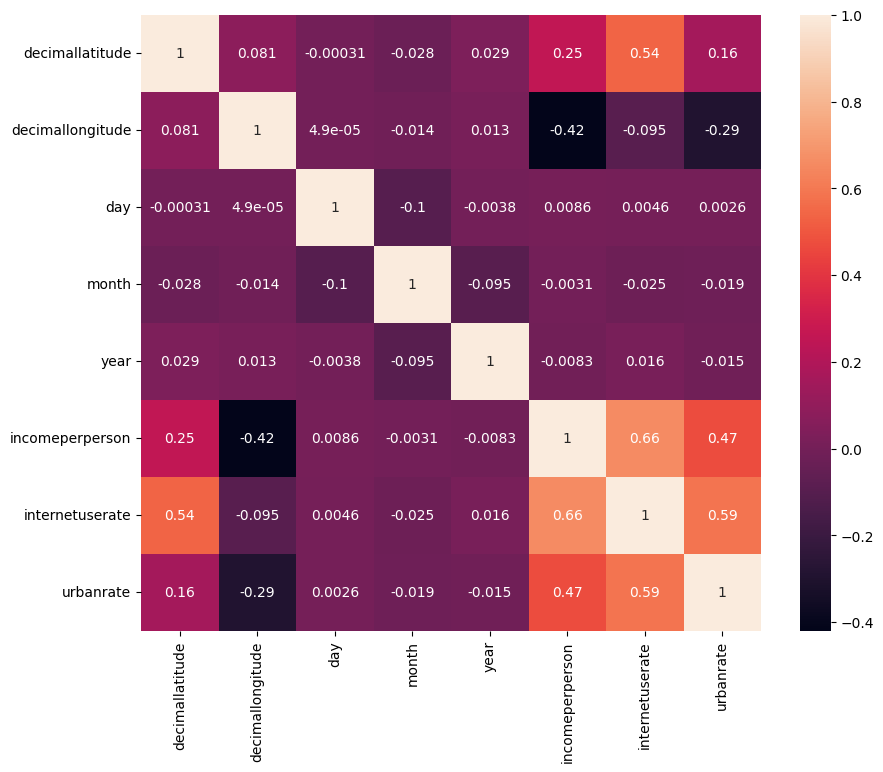

In [7]:
# Correlation matrix
corr_matrix=numerical_df.corr() # default: Pearson
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Discrete-continuous

In [8]:
def numerical_split(df, cat=36):
    num_continuous_df = pd.DataFrame()
    num_discrete_df = pd.DataFrame()

    for col in df.columns:
        if df[col].nunique() > cat:
            num_continuous_df[col] = df[col]

        else:
            num_discrete_df[col] = df[col]

    return num_continuous_df, num_discrete_df

continuous_df, discrete_df = numerical_split(numerical_df)

### Plot

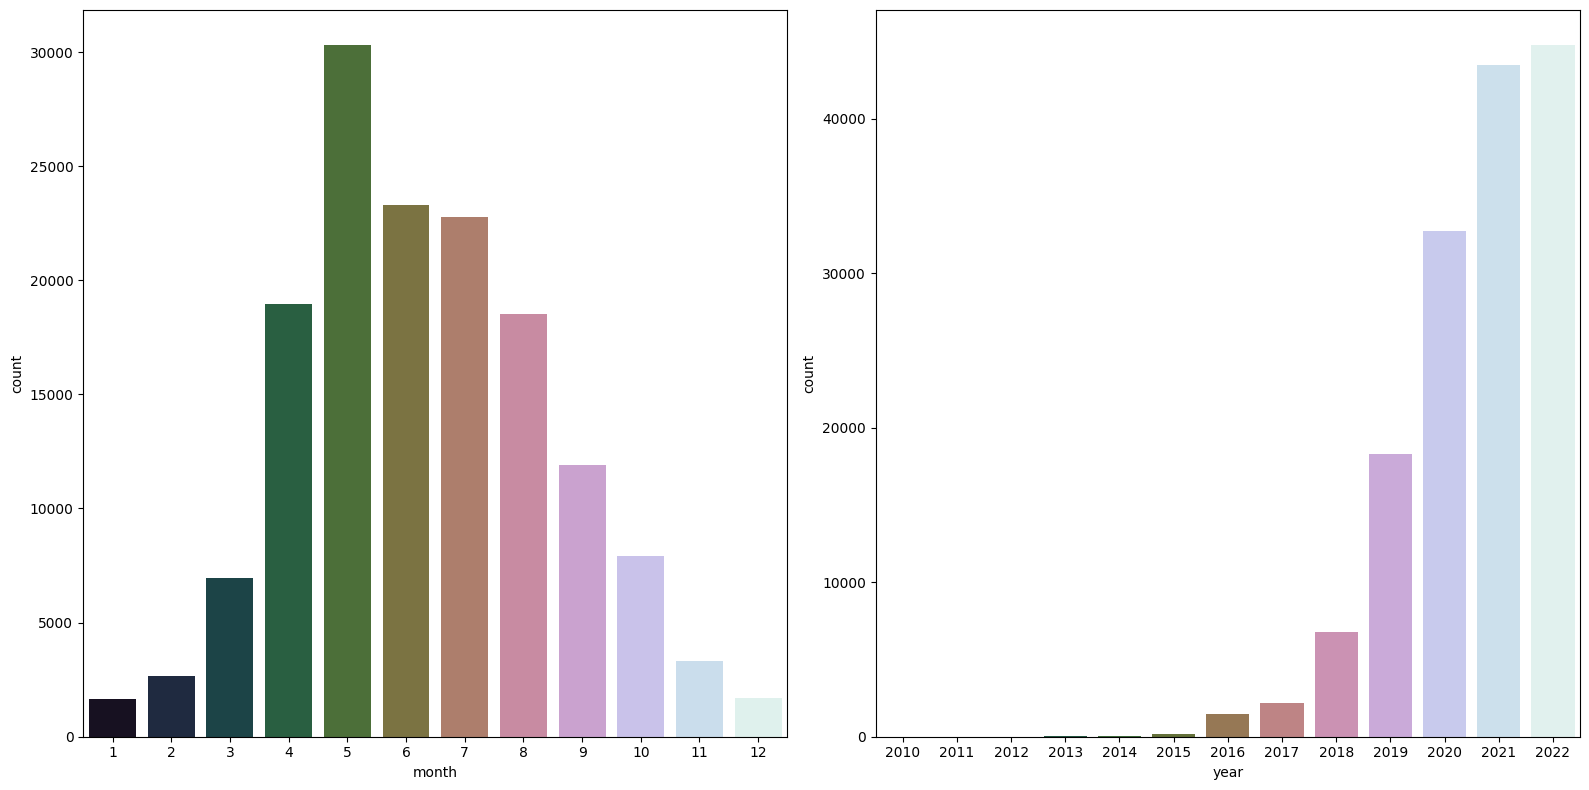

In [12]:
# countplot for descrete variables
def plot_discrete2(df):
    plt.figure(figsize=(16, 8))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.countplot(x=col, data=df, palette = "cubehelix")
    plt.tight_layout()
    plt.show()

plot_discrete2(discrete_df[['month', 'year']])    

In [ ]:
# histograms for continuous variables
def plot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.histplot(x=col, data=df, bins=150)
    plt.tight_layout()
    plt.show()

plot_continuous(continuous_df[[]])    

Outliers in numerical continuous variables

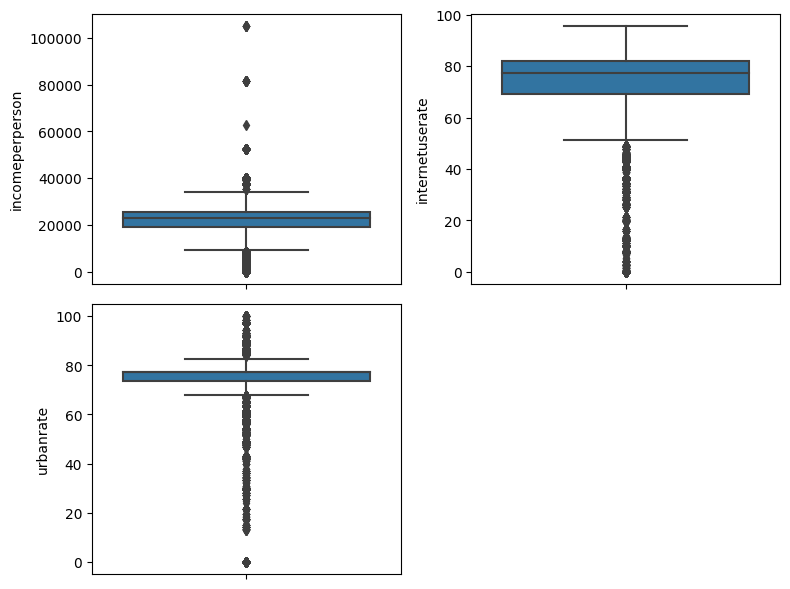

In [38]:
def boxplot_continuous(df):
    plt.figure(figsize=(8, 6))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.boxplot(y=col, data=df)
    plt.tight_layout()
    plt.show()

boxplot_continuous(continuous_df[['incomeperperson', 'internetuserate', 'urbanrate']])    

In [41]:
import plotly.express as px
#df = px.data.tips()
fig = px.box(continuous_df, y="urbanrate")
fig.show()

## Categorical

In [24]:
categorical_df.columns

Index(['occurrenceid', 'class', 'order', 'family', 'genus', 'species',
       'scientificname', 'countrycode', 'eventdate', 'country'],
      dtype='object')

In [25]:
print(categorical_df['countrycode'].unique())


['ES' 'FR' 'DE' 'RU' 'US' 'GB' 'IT' 'AT' 'NL' 'LU' 'AU' 'GR' 'PL' 'CZ'
 'CH' 'BE' 'ME' 'PE' 'BR' 'HU' 'LT' 'DK' 'TR' 'SE' 'RS' 'GP' 'SI' 'UA'
 'MA' 'IE' 'FI' 'CA' 'PT' 'IL' 'SK' 'LV' 'MX' 'SG' 'BO' 'IM' 'IN' 'RO'
 'BG' 'UY' 'HR' 'PH' 'ID' 'TW' 'NC' 'TH' 'PK' 'DZ' 'AR' 'RE' 'CR' 'NP'
 'KG' 'NO' 'EE' 'CO' 'JP' 'NZ' 'VN' 'MQ' 'BL' 'IR' 'SM' 'JE' 'GE' 'BY'
 'CL' 'SN' 'CY' 'TM' 'RW' 'AD' 'MT' 'GG' 'BM' 'VE' 'CN' 'CM' 'MD' 'IS'
 'UG' 'MZ' 'BD' 'ZA' 'GT' 'KM' 'DO' 'GD' 'TT' 'PR' 'VU' 'PY' 'BA' 'SV'
 'AL' 'EC' 'LI' 'unknown' 'IQ' 'NG' 'SA' 'SC' 'GI' 'TZ' 'HT' 'AX' 'BT'
 'GF' 'ZM' 'AZ' 'AM' 'EG' 'PF' 'UZ' 'ML' 'CU' 'KR' 'KE' 'XK' 'LC' 'MK'
 'VI' 'CW' 'HN' 'HK' 'MV' 'GA' 'MU' 'SY' 'MY' 'CD' 'LK' 'TN' 'KZ' 'LR'
 'LY' 'PA' 'MC' 'MF' 'BF' 'AE' 'JO' 'BB' 'TG' 'LB' 'BJ' 'CI' 'LA' 'SR'
 'NI' 'JM' 'PS' 'WF' 'BH' 'PM' 'OM' 'YE' 'DM' 'CV' 'MM' 'MW' 'BS' 'AO'
 'GN' 'FO' 'ET' 'GY' 'MR' 'BZ' 'GH' 'SL' 'MG' 'TD' 'AG' 'CK' 'MN' 'VG'
 'KH' 'DJ' 'AF' 'BQ' 'YT' 'KW']


### Plots

In [18]:
categorical_df['country'].value_counts()

country
France               46864
Germany              20306
Italy                11480
United States         9943
Spain                 9137
                     ...  
Yemen                    1
Liberia                  1
Bahrain                  1
Wallis and Futuna        1
Kuwait                   1
Name: count, Length: 186, dtype: int64

In [29]:
# group countries by region
africa = ['DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD', 'CI', 'DJ', 'EG', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'KE', 'LS', 'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'YT', 'MA', 'MZ', 'NA', 'NE', 'NG', 'RE', 'RW', 'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG', 'EH', 'ZM', 'ZW']
asia = ['AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CY', 'GE', 'IN', 'ID', 'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KW', 'KG', 'LA', 'LB', 'MY', 'MV', 'MN', 'MM', 'NP', 'KP', 'OM', 'PK', 'PS', 'PH', 'QA', 'SA', 'SG', 'KR', 'LK', 'SY', 'TW', 'TJ', 'TH', 'TL', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE']
europe = ['AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FO', 'FI', 'FR', 'DE', 'GI', 'GR', 'HU', 'IS', 'IE', 'IM', 'IT', 'XK', 'LV', 'LI', 'LT', 'LU', 'MK', 'MT', 'MD', 'MC', 'ME', 'NL', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB', 'VA']
north_america = ['AG', 'BS', 'BB', 'BZ', 'CA', 'CR', 'CU', 'CW', 'DM', 'DO', 'SV', 'GL', 'GD', 'GT', 'HT', 'HN', 'JM', 'MX', 'MS', 'NI', 'PA', 'PR', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'US', 'VG', 'VI']
south_america = ['AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'FK', 'GF', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE']
oceania = ['AS', 'AU', 'CK', 'FJ', 'PF', 'GU', 'KI', 'MH', 'FM', 'NR', 'NC', 'NZ', 'NU', 'MP', 'PW', 'PG', 'PN', 'WS', 'SB', 'TK', 'TO', 'TV', 'UM', 'VU', 'WF']

def get_region(countrycode):
    if countrycode in africa:
        return 'Africa'
    elif countrycode in asia:
        return 'Asia'
    elif countrycode in europe:
        return 'Europe'
    elif countrycode in north_america:
        return 'North America'
    elif countrycode in south_america:
        return 'South America'
    elif countrycode in oceania:
        return 'Oceania'
    else:
        return 'unknown'


In [30]:
categorical_df['region'] = categorical_df['countrycode'].apply(get_region)

In [31]:
categorical_df.head()

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,eventdate,country,region
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,2016-05-28 11:32:01.482,Spain,Europe
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,2019-08-18 12:02:28.413,France,Europe
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,2022-05-20 21:10:09.158,France,Europe
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,2019-04-14 10:50:38.537,France,Europe
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,2022-03-14 14:36:23.989,Germany,Europe


In [32]:
categorical_df['region'].value_counts(dropna=False)

region
Europe           132966
North America     12279
Asia               1718
South America      1455
Africa              710
Oceania             609
unknown             263
Name: count, dtype: int64

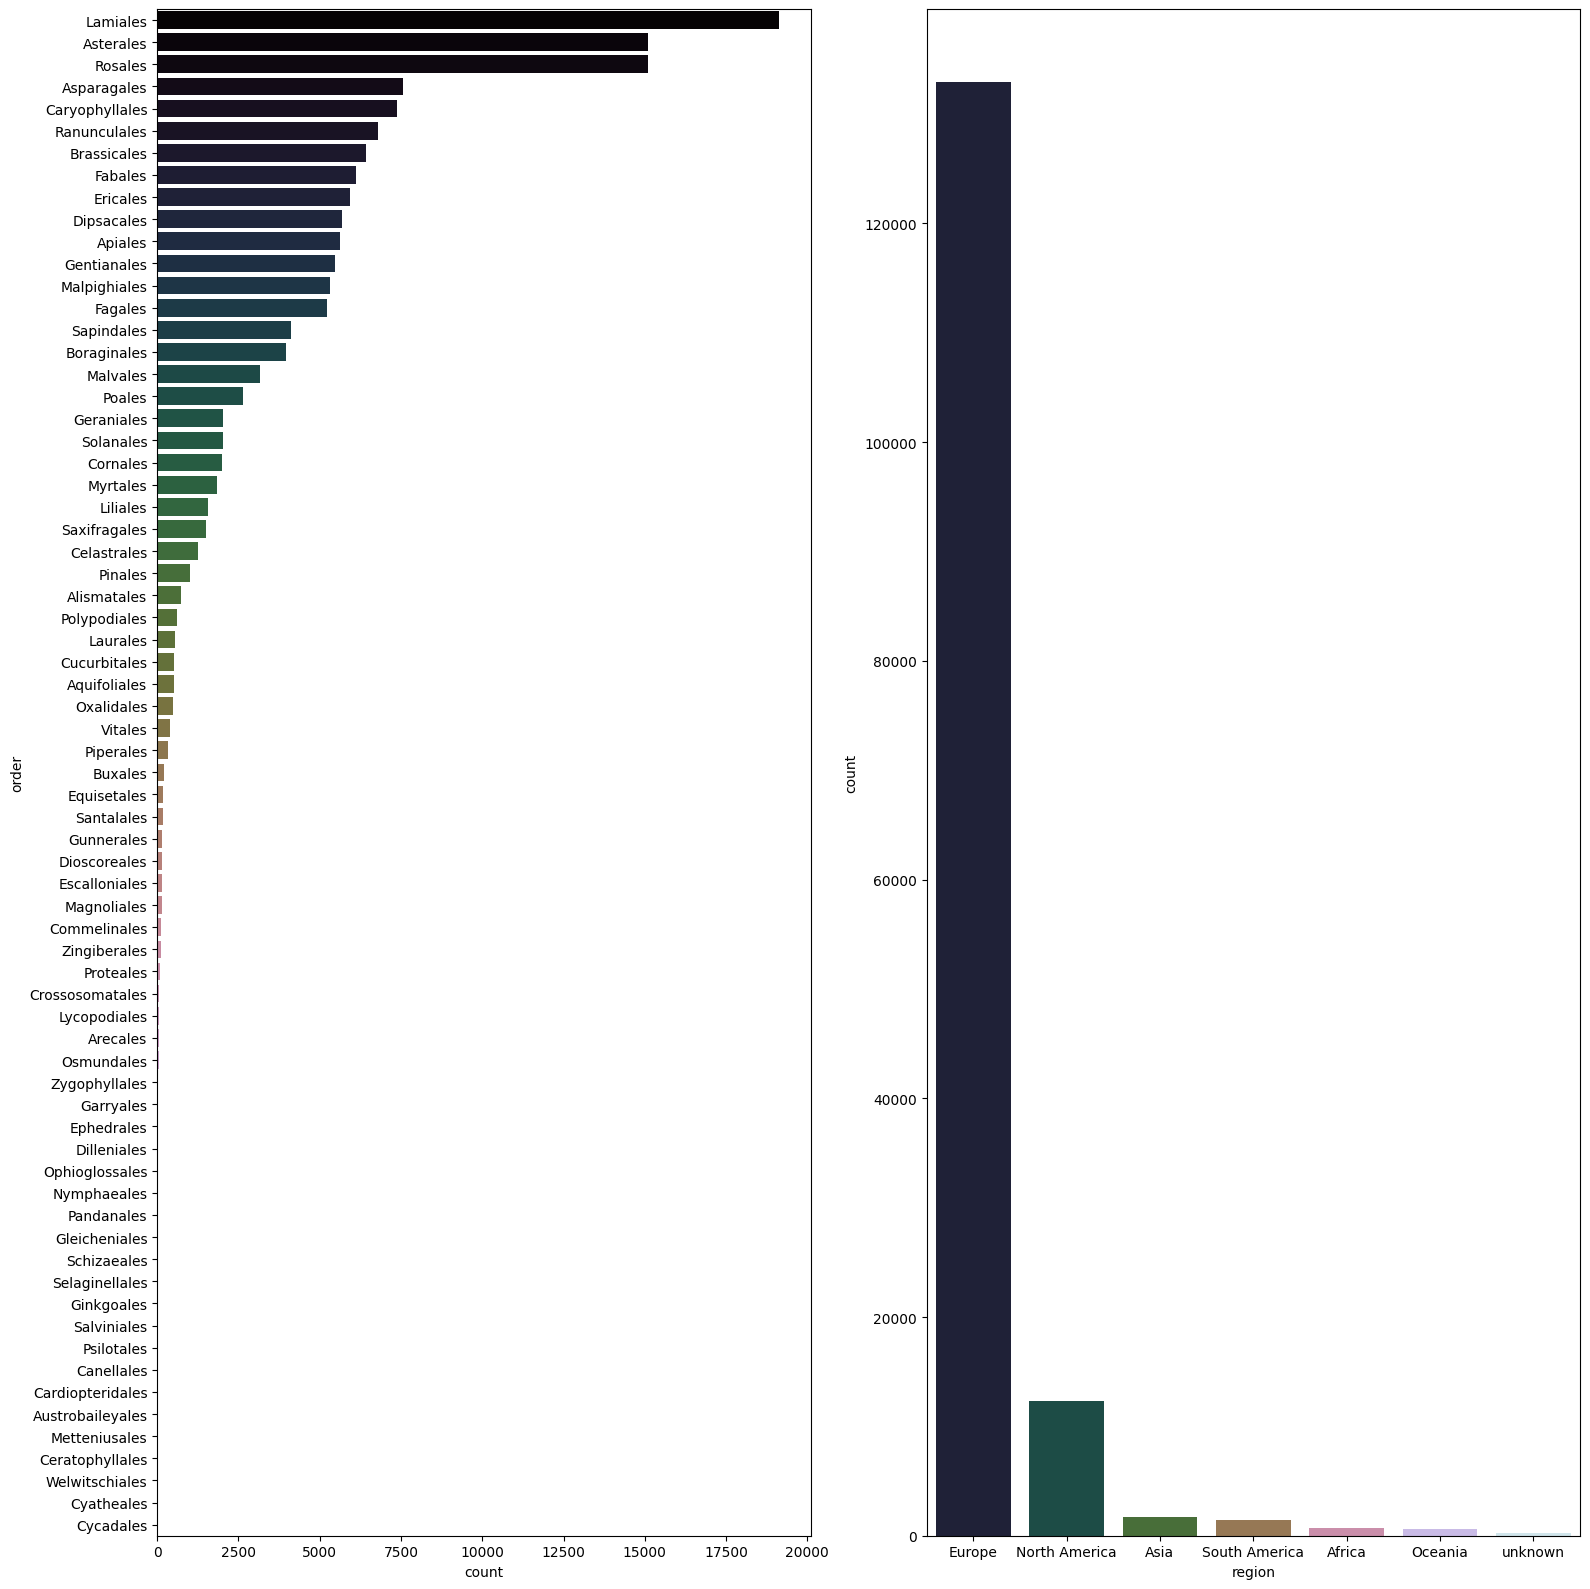

In [35]:
def plot_categorical(df, cat=8):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        if df[col].nunique() < cat:
            sns.countplot(x=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")
        else:
            sns.countplot(y=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")   
    plt.tight_layout()
    plt.show()

plot_categorical(categorical_df[['order', 'region']])    

## Temporal analysis

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x= 'effective_to_date', y='total_claim_amount', data=plant, ci=None)

plt.xticks(rotation=20)
plt.show()